# Analysis of International Football Statistics 
**By:** Jenny Howard


**data:** https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017


**source:** The data is gathered from several sources including Wikipedia, fifa.com, rsssf.com and individual football associations' websites.


**columns:** 
   
* **date** - date of the match
* **home_team** - name of the home team
* **away_team** - name of the away team
* **home_score** - full time home team score including extra time, not including penalty-shootouts
* **away_score** - full time away team score including extra time, not including penalty-shootouts
* **tournament** - name of the tournament
* **city** - name of the city/town/administrative unit where the match was played
* **country** - name of the country where the match was played
* **neutral** - TRUE/FALSE column indicating whether the match was played at a neutral venue
           

This dataset gives information about international football (soccer) matches from the first official match in 1872 to 2018. It should be noted that the team names listes are the current name of the team. As stated on the link to the data:

"For example when in 1882 a team who called themselves Ireland played against England, in this dataset it is called Northern Ireland because the current team of Northern Ireland is the successor of the 1882 Ireland team. This is done so it is easier to track the history and statistics of teams.

For country names the name of the country at the time of the match is used. So when Ghana played in Accra, Gold Coast in the 1950s, even though the names of the home team and the country don't match, it was a home match for Ghana. This is indicated by the neutral column, which says FALSE for those matches, meaning it was not at a neutral venue."



The question I will be asking and answering with this data exploration is: **do friendly matches help a team's overall score?** In particular, I will look at whether the number of friendly matches has a correlation to higher score **in World Cup Qualification matches.** Furthermore, I will specifically be investigating this question with respect to five Latinx/Hispanic countries: **Argentina, Brasil, México, Perú, and Spain.**

I start exploring the data by looking at summary statistics, distributions, and correlations.

In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
plt.rcParams['figure.figsize']=(20.0, 10.0)

In [8]:
football = pd.read_csv("/Users/Jenny/Documents/Thinkful/international football data/results.csv")
football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [9]:
#summary stats
football.describe()

,home_score,away_score
count,38929.000000,38929.000000
mean,1.741247,1.180611
std,1.731551,1.379373
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


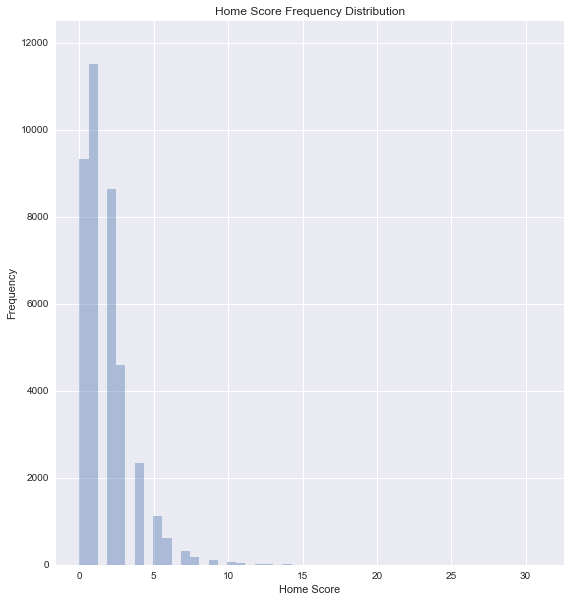

In [11]:
#frequency of home scores
plt.subplot(1, 2, 1)
plt.ylim(0, 12500)
sns.distplot(football.home_score, kde = False)
plt.xlabel('Home Score')
plt.ylabel('Frequency')
plt.title('Home Score Frequency Distribution')

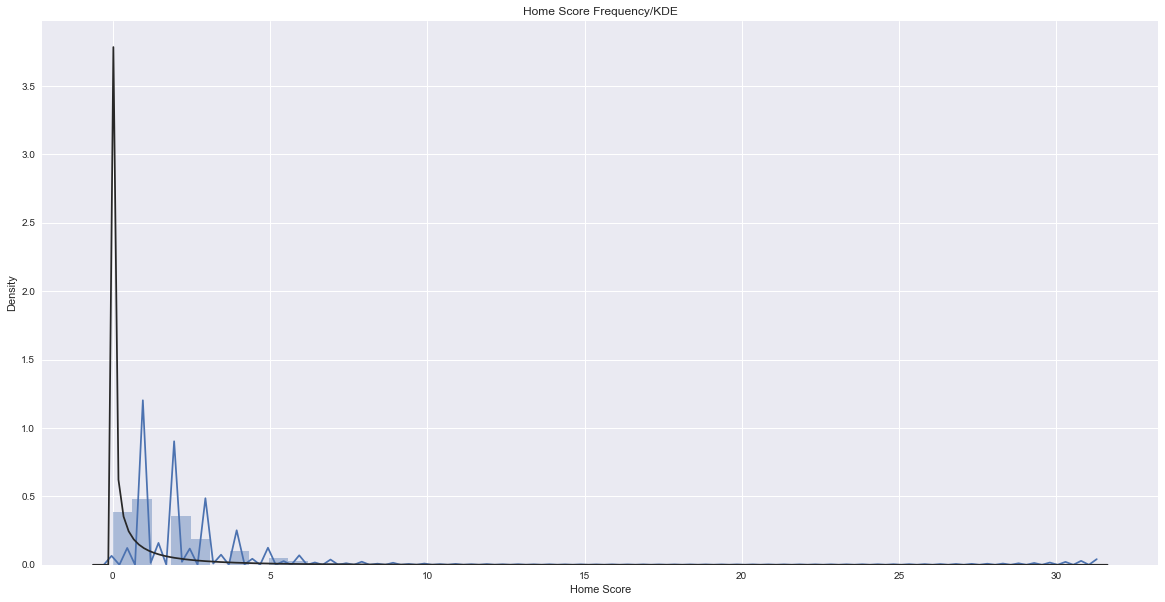

In [12]:
#dist. of home scores
sns.distplot(football.home_score, fit = stats.gamma)
plt.xlabel('Home Score')
plt.ylabel('Density')
plt.title('Home Score Frequency/KDE')

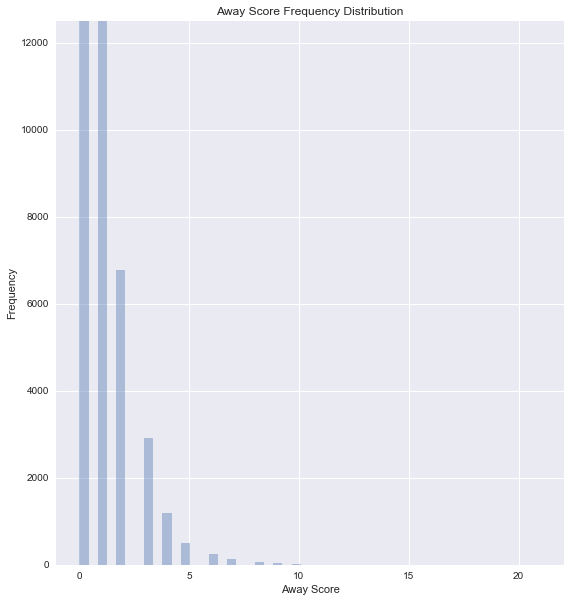

In [13]:
#frequency of away scores
plt.subplot(1, 2, 2)
plt.ylim(0, 12500)
sns.distplot(football.away_score, kde = False)
plt.xlabel('Away Score')
plt.ylabel('Frequency')
plt.title('Away Score Frequency Distribution')

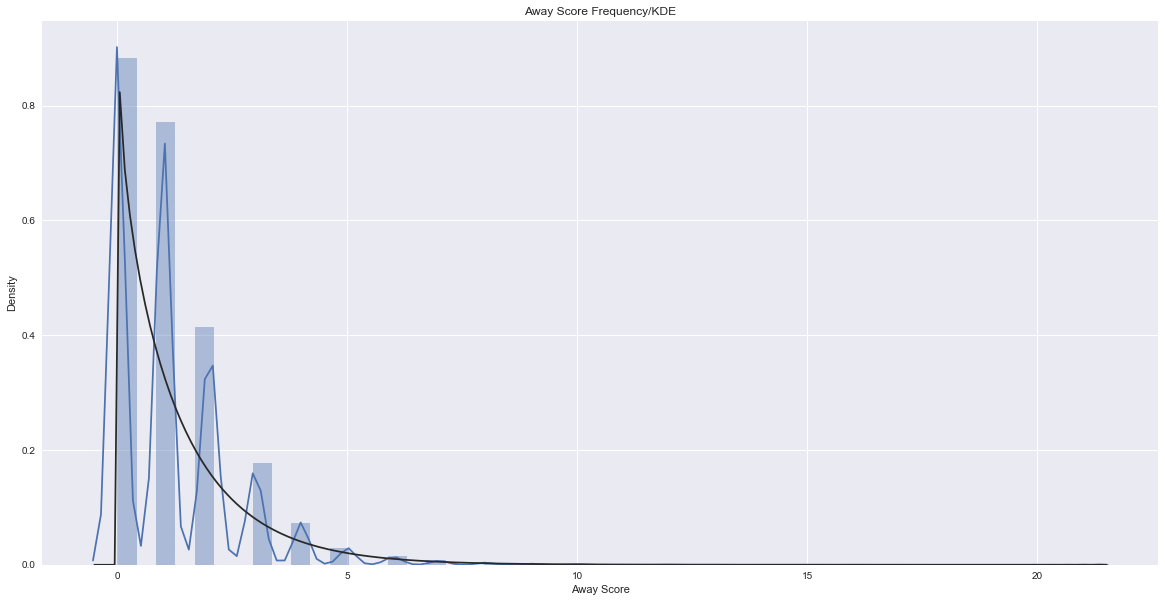

In [15]:
#dist. of away scores
sns.distplot(football.away_score, fit = stats.gamma)
plt.xlabel('Away Score')
plt.ylabel('Density')
plt.title('Away Score Frequency/KDE')

In [16]:
#correlation
football.corr()

,home_score,away_score,neutral
home_score,1.000000,-0.129372,-0.035950
away_score,-0.129372,1.000000,0.079389
neutral,-0.035950,0.079389,1.000000


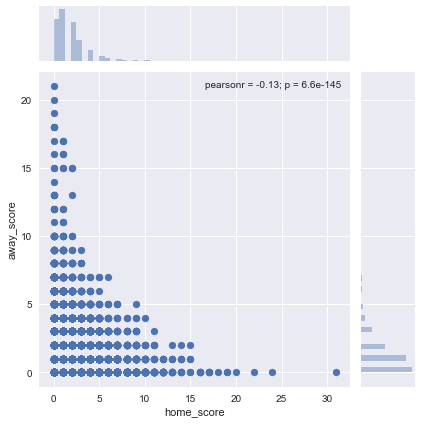

In [17]:
#comparing home scores and away scores
sns.jointplot(x="home_score", y="away_score", data=football)

Having now looked at the data in general, **I create two subsets of data**: one dataframe when the five countries I'm looking at are the home team, and another dataframe when those countries are the away team.

In [95]:
#checking categorical vars for 5 hispanic/latin american countries
#creating dfs for when those 5 countries are the home team or away team
hisplatin_home = football[(football.home_team == 'Spain') | 
                        (football.home_team == 'Mexico')| 
                        (football.home_team == 'Argentina')|
                        (football.home_team == 'Brazil')|
                        (football.home_team == 'Peru')]
                                  
pd.DataFrame(hisplatin_home)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
152,1903-09-13,Argentina,Uruguay,2,3,Friendly,Buenos Aires,Argentina,False
173,1905-08-15,Argentina,Uruguay,0,0,Copa Lipton,Buenos Aires,Argentina,False
186,1906-10-21,Argentina,Uruguay,2,1,Copa Newton,Buenos Aires,Argentina,False
222,1908-09-13,Argentina,Uruguay,2,1,Copa Newton,Buenos Aires,Argentina,False
223,1908-10-04,Argentina,Uruguay,0,1,Copa Premio Honor Argentino,Buenos Aires,Argentina,False
243,1909-08-15,Argentina,Uruguay,2,1,Copa Lipton,Buenos Aires,Argentina,False
245,1909-10-10,Argentina,Uruguay,3,1,Copa Premio Honor Argentino,Buenos Aires,Argentina,False
261,1910-05-27,Argentina,Chile,3,1,Friendly,Buenos Aires,Argentina,False
263,1910-06-05,Argentina,Chile,5,1,Friendly,Buenos Aires,Argentina,False
264,1910-06-12,Argentina,Uruguay,4,1,Friendly,Buenos Aires,Argentina,False


In [96]:
hisplatin_away = football[(football.away_team == 'Spain') | 
                        (football.away_team == 'Mexico')| 
                        (football.away_team == 'Argentina')|
                        (football.away_team == 'Brazil')|
                        (football.away_team == 'Peru')] 

pd.DataFrame(hisplatin_away)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
144,1902-07-20,Uruguay,Argentina,0,6,Friendly,Montevideo,Uruguay,False
184,1906-08-15,Uruguay,Argentina,0,2,Copa Lipton,Montevideo,Uruguay,False
221,1908-08-15,Uruguay,Argentina,2,2,Copa Lipton,Montevideo,Uruguay,False
244,1909-09-19,Uruguay,Argentina,2,2,Copa Newton,Montevideo,Uruguay,False
265,1910-08-15,Uruguay,Argentina,3,1,Copa Lipton,Montevideo,Uruguay,False
266,1910-09-11,Chile,Argentina,0,3,Friendly,Viña del Mar,Chile,False
294,1911-09-17,Uruguay,Argentina,2,3,Copa Newton,Montevideo,Uruguay,False
295,1911-10-08,Uruguay,Argentina,1,1,Copa Premio Honor Uruguayo,Montevideo,Uruguay,False
302,1911-10-29,Uruguay,Argentina,3,0,Copa Premio Honor Uruguayo,Montevideo,Uruguay,False
328,1912-08-15,Uruguay,Argentina,2,0,Copa Lipton,Montevideo,Uruguay,False


Using these new dataframes, I **count and graph the number of times the countries have played** as the home team or away team respectively.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

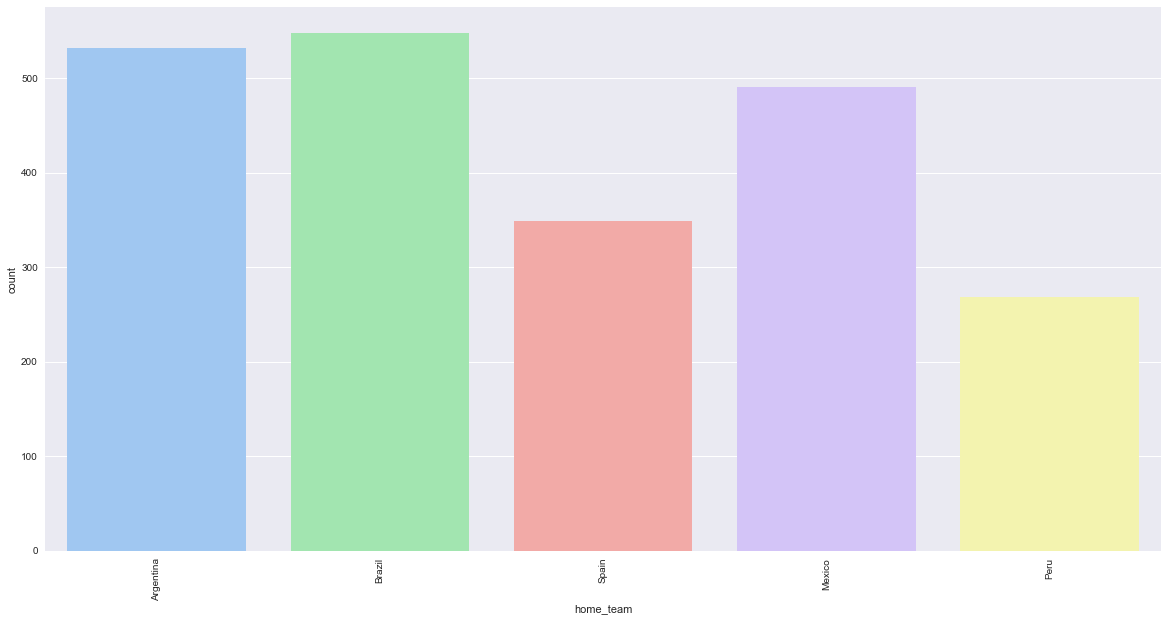

In [101]:
#number of times those teams are the home team
sns.countplot(x="home_team", data=hisplatin_home, palette="pastel")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

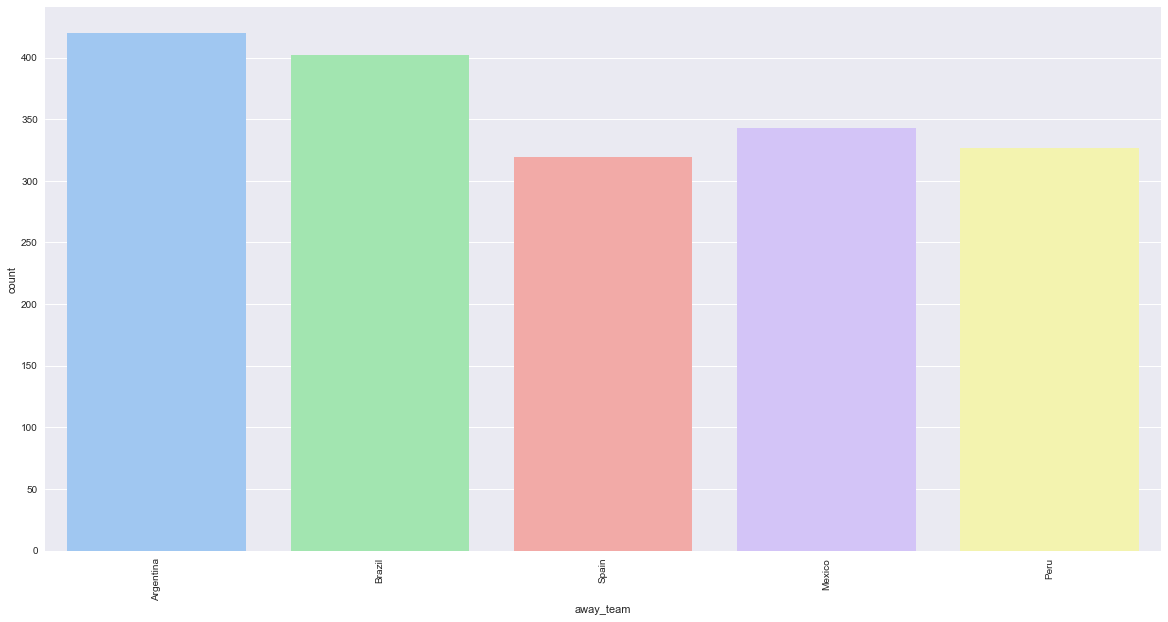

In [100]:
#number of times those countries are the away team
sns.countplot(x="away_team", data=hisplatin_away, palette="pastel")
plt.xticks(rotation=90)

Now, I'll create **two new columns** for both dataframes: one that will display **if the match was friendly**, and one that will display **if the match was the World Cup Qualifying round**.

In [117]:
#want to create a df with hisplatin, where friendly = 1, otherwise 0
#aqui lo tiene por los equipos locales
hisplatin_home['friendly'] = np.where(hisplatin_home['tournament'] == 'Friendly', 1, 0)
hisplatin_home['world_cup_qual'] = np.where(hisplatin_home['tournament'] == 'FIFA World Cup qualification', 1, 0)
pd.DataFrame(hisplatin_home)

C:\Users\Jenny\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jenny\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,friendly,world_cup_qual
152,1903-09-13,Argentina,Uruguay,2,3,Friendly,Buenos Aires,Argentina,False,1,0
173,1905-08-15,Argentina,Uruguay,0,0,Copa Lipton,Buenos Aires,Argentina,False,0,0
186,1906-10-21,Argentina,Uruguay,2,1,Copa Newton,Buenos Aires,Argentina,False,0,0
222,1908-09-13,Argentina,Uruguay,2,1,Copa Newton,Buenos Aires,Argentina,False,0,0
223,1908-10-04,Argentina,Uruguay,0,1,Copa Premio Honor Argentino,Buenos Aires,Argentina,False,0,0
243,1909-08-15,Argentina,Uruguay,2,1,Copa Lipton,Buenos Aires,Argentina,False,0,0
245,1909-10-10,Argentina,Uruguay,3,1,Copa Premio Honor Argentino,Buenos Aires,Argentina,False,0,0
261,1910-05-27,Argentina,Chile,3,1,Friendly,Buenos Aires,Argentina,False,1,0
263,1910-06-05,Argentina,Chile,5,1,Friendly,Buenos Aires,Argentina,False,1,0
264,1910-06-12,Argentina,Uruguay,4,1,Friendly,Buenos Aires,Argentina,False,1,0


In [118]:
#y, aqui esta por los equipos afueras
hisplatin_away['friendly'] = np.where(hisplatin_away['tournament'] == 'Friendly', 1, 0)
hisplatin_away['world_cup_qual'] = np.where(hisplatin_away['tournament'] == 'FIFA World Cup qualification', 1, 0)
pd.DataFrame(hisplatin_away)

C:\Users\Jenny\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jenny\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,friendly,world_cup_qual
144,1902-07-20,Uruguay,Argentina,0,6,Friendly,Montevideo,Uruguay,False,1,0
184,1906-08-15,Uruguay,Argentina,0,2,Copa Lipton,Montevideo,Uruguay,False,0,0
221,1908-08-15,Uruguay,Argentina,2,2,Copa Lipton,Montevideo,Uruguay,False,0,0
244,1909-09-19,Uruguay,Argentina,2,2,Copa Newton,Montevideo,Uruguay,False,0,0
265,1910-08-15,Uruguay,Argentina,3,1,Copa Lipton,Montevideo,Uruguay,False,0,0
266,1910-09-11,Chile,Argentina,0,3,Friendly,Viña del Mar,Chile,False,1,0
294,1911-09-17,Uruguay,Argentina,2,3,Copa Newton,Montevideo,Uruguay,False,0,0
295,1911-10-08,Uruguay,Argentina,1,1,Copa Premio Honor Uruguayo,Montevideo,Uruguay,False,0,0
302,1911-10-29,Uruguay,Argentina,3,0,Copa Premio Honor Uruguayo,Montevideo,Uruguay,False,0,0
328,1912-08-15,Uruguay,Argentina,2,0,Copa Lipton,Montevideo,Uruguay,False,0,0


Now, we review the &**scores by friendliness** using counts. We'll do a similar process for neutrality to see how they compare.

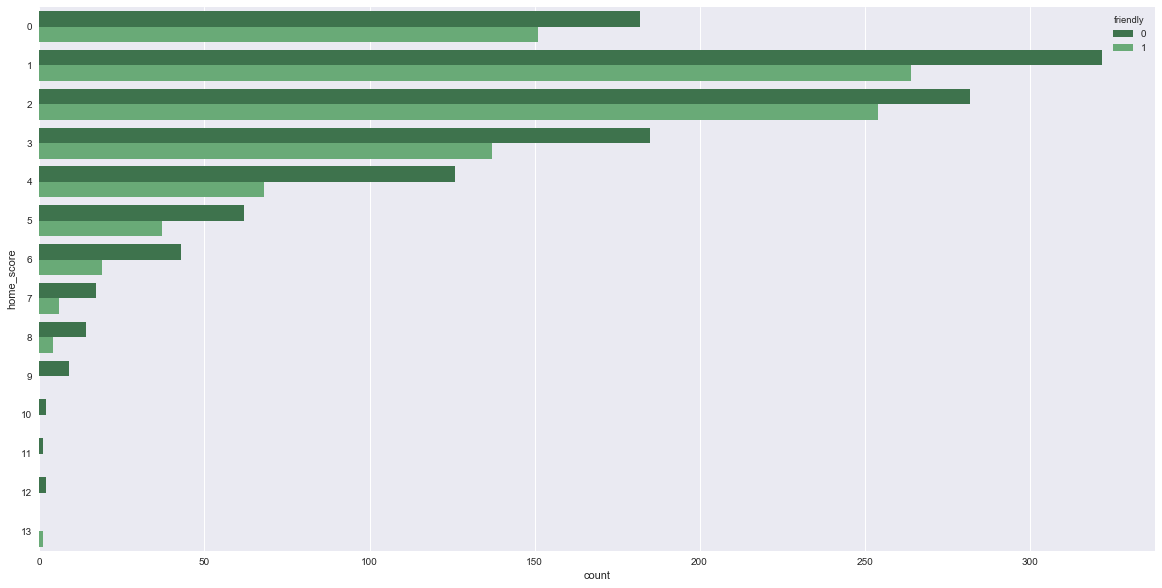

friendly      0    1
home_score          
0           182  151
1           322  264
2           282  254
3           185  137
4           126   68
5            62   37
6            43   19
7            17    6
8            14    4
9             9    0
10            2    0
11            1    0
12            2    0
13            0    1
Power_divergenceResult(statistic=3633.2614259597808, pvalue=0.0)


In [125]:
#looking at scores by friendliness for home team
#plot counts for each combo of lvls
sns.countplot(y = "home_score", hue = "friendly", data = hisplatin_home, palette = "Greens_d")
plt.show()

#table of counts
counttable = pd.crosstab(hisplatin_home['home_score'], hisplatin_home['friendly'])
print(counttable)

#chi-square
print(stats.chisquare(counttable, axis = None))

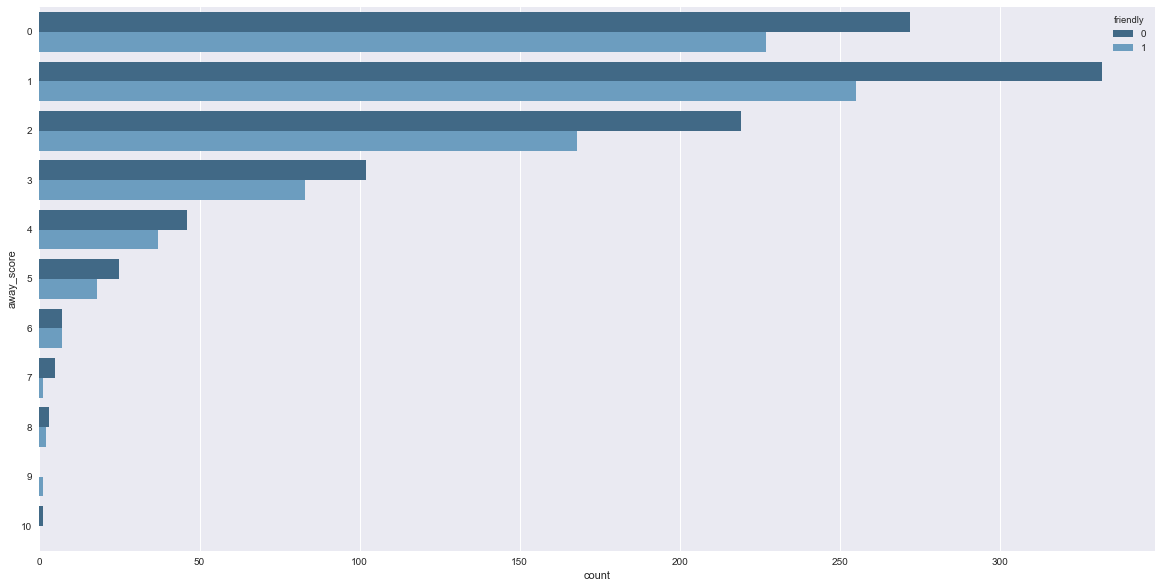

friendly    0.0  1.0
away_score          
0.0          62   43
1.0          73   52
2.0          38   15
3.0          15   12
4.0           5    5
5.0           2    0
Power_divergenceResult(statistic=267.49068322981373, pvalue=6.0156421594146257e-51)


In [126]:
#scores by friendliness for away team
#plot counts for each combo of lvls
sns.countplot(y = "away_score", hue = "friendly", data = hisplatin_away, palette = "Blues_d")
plt.show()

#table of counts
counttable = pd.crosstab(hisplatin_away['away_score'], hisplatin_home['friendly'])
print(counttable)

#chi-square
print(stats.chisquare(counttable, axis = None))

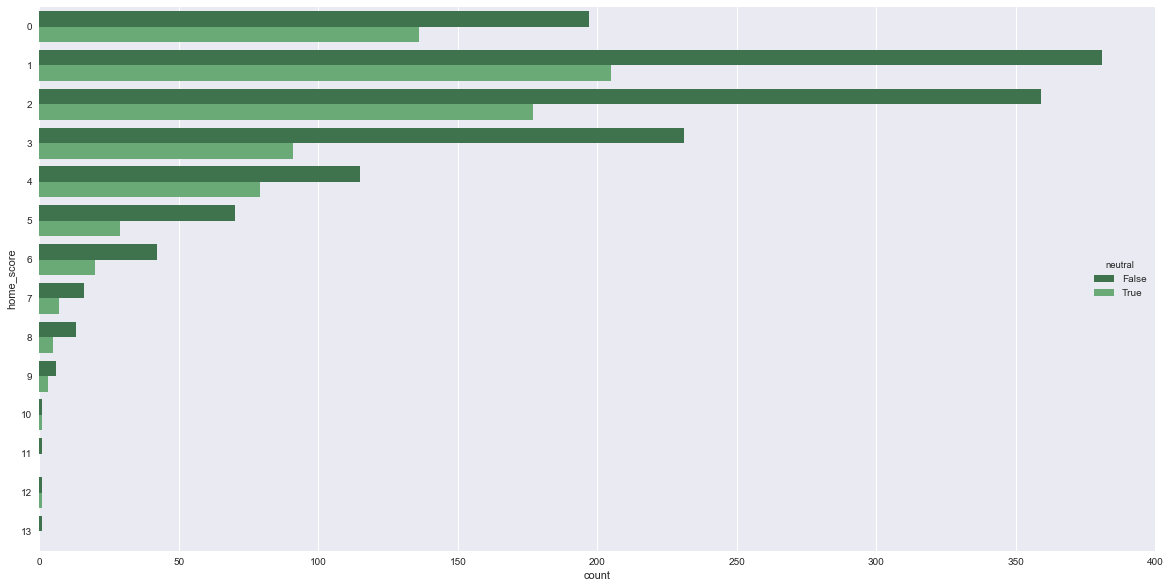

neutral     False  True 
home_score              
0             197    136
1             381    205
2             359    177
3             231     91
4             115     79
5              70     29
6              42     20
7              16      7
8              13      5
9               6      3
10              1      1
11              1      0
12              1      1
13              1      0
Power_divergenceResult(statistic=4137.1334552102389, pvalue=0.0)


In [127]:
#looking at scores by neutrality for home team
#plot counts for each combo of lvls
sns.countplot(y = "home_score", hue = "neutral", data = hisplatin_home, palette = "Greens_d")
plt.show()

#table of counts
counttable = pd.crosstab(hisplatin_home['home_score'], hisplatin_home['neutral'])
print(counttable)

#chi-square
print(stats.chisquare(counttable, axis = None))

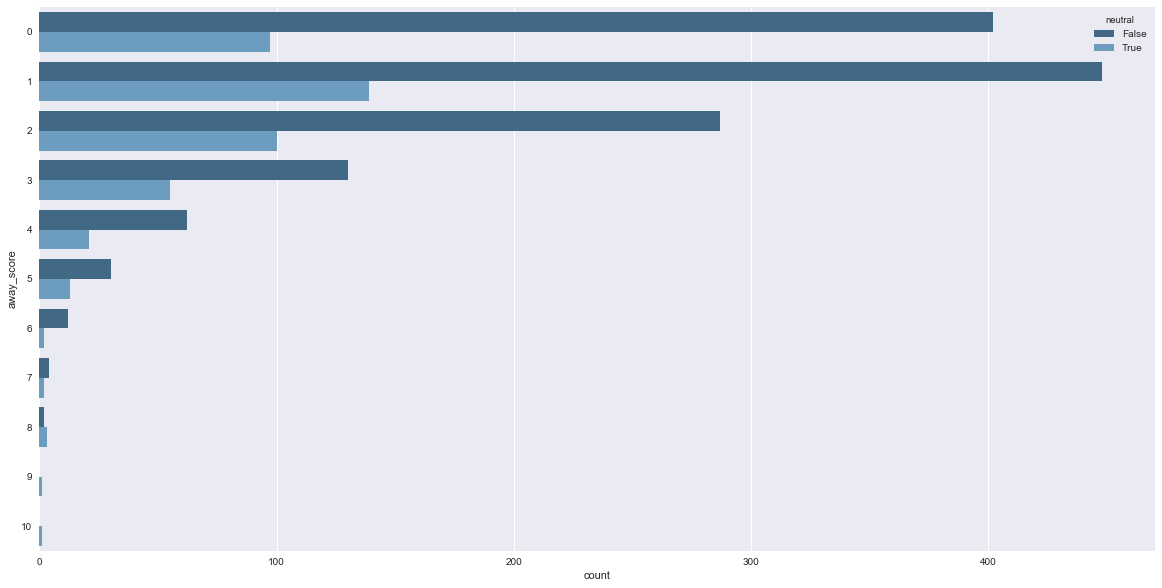

neutral     False  True 
away_score              
0.0            67     38
1.0            85     40
2.0            30     23
3.0            18      9
4.0             6      4
5.0             2      0
Power_divergenceResult(statistic=298.42236024844721, pvalue=1.883061389134604e-57)


In [128]:
#scores by neutrality for away team
#plot counts for each combo of lvls
sns.countplot(y = "away_score", hue = "neutral", data = hisplatin_away, palette = "Blues_d")
plt.show()

#table of counts
counttable = pd.crosstab(hisplatin_away['away_score'], hisplatin_home['neutral'])
print(counttable)

#chi-square
print(stats.chisquare(counttable, axis = None))

In [136]:
#defined these in case I only wanted to look at one specific country; didn't wind up using them for this exploration.

spain_away = hisplatin_away[(hisplatin_away.away_team == 'Spain')]

mexico_away = hisplatin_away[(hisplatin_away.away_team == 'Mexico')]

brazil_away = hisplatin_away[(hisplatin_away.away_team == 'Brazil')]

argentina_away = hisplatin_away[(hisplatin_away.away_team == 'Argentina')]

peru_away = hisplatin_away[(hisplatin_away.away_team == 'Peru')]

spain_home = hisplatin_home[(hisplatin_home.home_team == 'Spain')]

mexico_home = hisplatin_home[(hisplatin_home.home_team == 'Mexico')]

brazil_home = hisplatin_home[(hisplatin_home.home_team == 'Brazil')]

argentina_home = hisplatin_home[(hisplatin_home.home_team == 'Argentina')]

peru_home = hisplatin_home[(hisplatin_home.home_team == 'Peru')]

In [ ]:
#want to look at whether or not friendly tournaments help or hurt a team
#to do this -- look at number of friendly matches for each team
#then, look at average scores of these teams where friendly == false. Particularly, where WCQ == true
#to be more specific, look at number of friendly matches between dates of WCQ, and analyze similarly.
#also look at correlation between scores and neutrality
#other meaningful stats: mean and median of scores 
#(in general, when friendly, when neutral, when neutral AND friendly, for wcq)

Here, we calculate the **ratio of friendly to unfriendly matches**, as well as the **mean, median, and standard deviation of scores**.

In [188]:
#Calculating the percent of friendly matches for these five countries, as recorded on this dataset.

total_games = len(hisplatin_home.index) + len(hisplatin_away.index)
print('Total number of matches: ', total_games)


hisplatin_num_friendly = hisplatin_home['friendly'].sum() + hisplatin_away['friendly'].sum()
print('Number of friendly matches: ', hisplatin_num_friendly)


percent_friendly = (hisplatin_num_friendly/total_games) * 100
print('Percentage of friendly matches: ', percent_friendly)

percent_unfriendly = 100 - percent_friendly
print('Percentage of competitive matches: ', percent_unfriendly)


Total number of matches:  3999
Number of friendly matches:  1740
Percentage of friendly matches:  43.5108777194
Percentage of competitive matches:  56.4891222806


In [206]:
df_count_home = hisplatin_home.groupby('friendly', as_index = False).count()
df_count_home.head()

,friendly,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,world_cup_qual
0,0,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
1,1,941,941,941,941,941,941,941,941,941,941


In [207]:
df_count_away = hisplatin_away.groupby('friendly', as_index = False).count()
df_count_away.head()

,friendly,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,world_cup_qual
0,0,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012
1,1,799,799,799,799,799,799,799,799,799,799


In [196]:
#mean of scores for home
df_mean_home = hisplatin_home.groupby('friendly', as_index = False).mean()
df_mean_home.head()

,friendly,home_score,away_score,neutral,world_cup_qual
0,0,2.309543,0.882919,0.438653,0.272654
1,1,1.956429,0.870351,0.219979,0.000000


In [199]:
#mean of scores for away
df_mean_away = hisplatin_away.groupby('friendly', as_index = False).mean()
df_mean_away.head()

,friendly,home_score,away_score,neutral,world_cup_qual
0,0,1.292490,1.478261,0.333004,0.320158
1,1,1.220275,1.441802,0.121402,0.000000


In [201]:
#median of scores for home
df_median_home = hisplatin_home.groupby('friendly', as_index = False).median()
df_median_home.head()

,friendly,home_score,away_score,neutral,world_cup_qual
0,0,2,1,False,0
1,1,2,1,False,0


In [202]:
#median of scores for away
df_median_away = hisplatin_away.groupby('friendly', as_index = False).median()
df_median_away.head()

,friendly,home_score,away_score,neutral,world_cup_qual
0,0,1,1,False,0
1,1,1,1,False,0


In [203]:
#standard dev. of scores for home
df_std_home = hisplatin_home.groupby('friendly').std(ddof=0)
df_std_home.head()

,away_score,home_score,neutral,world_cup_qual
friendly,,,,
0,1.062183,1.929910,0.496222,0.445325
1,0.993166,1.572618,0.414232,0.000000


In [204]:
#standard dev. of scores for away
df_std_away = hisplatin_away.groupby('friendly').std(ddof=0)
df_std_away.head()

,away_score,home_score,neutral,world_cup_qual
friendly,,,,
0,1.428300,1.254014,0.471288,0.466537
1,1.399555,1.237317,0.326594,0.000000


In [208]:
#JOIN stddev column over to final df. (see below)
merged_home = pd.merge(df_std_home, df_count_home, left_index = True, right_on='friendly', how = "inner")
merged_home.head()

,away_score_x,home_score_x,neutral_x,world_cup_qual_x,friendly,date,home_team,away_team,home_score_y,away_score_y,tournament,city,country,neutral_y,world_cup_qual_y
0,1.062183,1.929910,0.496222,0.445325,0,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
1,0.993166,1.572618,0.414232,0.000000,1,941,941,941,941,941,941,941,941,941,941


In [210]:
merged_away = pd.merge(df_std_away, df_count_away, left_index = True, right_on='friendly', how = "inner")
merged_away.head()

,away_score_x,home_score_x,neutral_x,world_cup_qual_x,friendly,date,home_team,away_team,home_score_y,away_score_y,tournament,city,country,neutral_y,world_cup_qual_y
0,1.428300,1.254014,0.471288,0.466537,0,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012
1,1.399555,1.237317,0.326594,0.000000,1,799,799,799,799,799,799,799,799,799,799


We create a violin graph showing the scores by the team, with hue indicating whether or not the match was friendly.

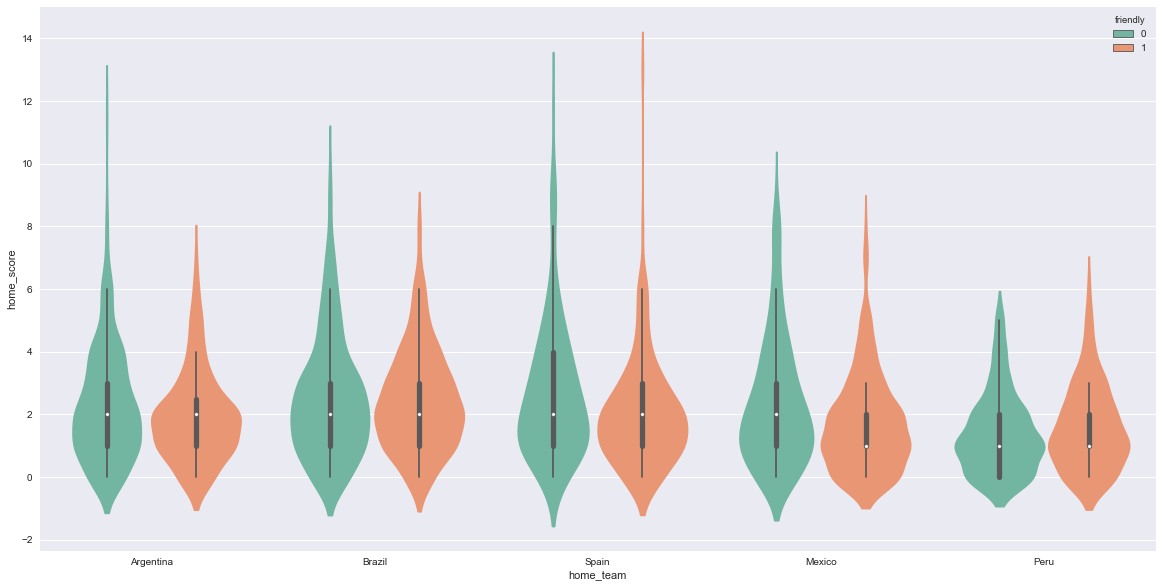

In [227]:
#plot showing home scores by home team, with color indicating friendly or competitive matches
sns.violinplot(x="home_team", y="home_score", hue="friendly", data=hisplatin_home, split = False, palette = 'Set2')

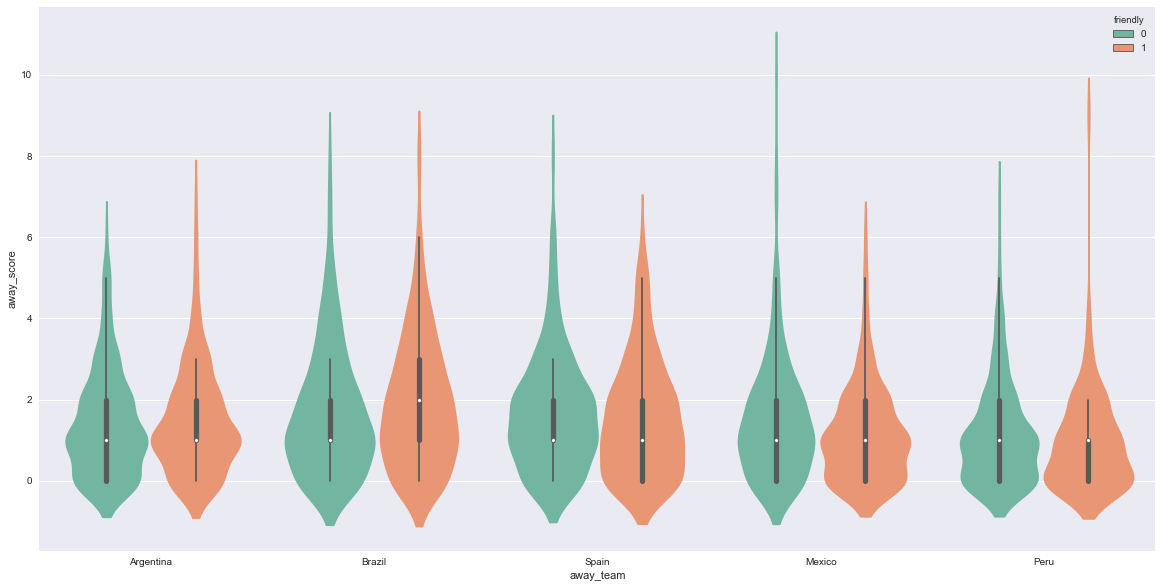

In [222]:
##plot showing away scores by away team, with color indicating friendly or competitive matches
sns.violinplot(x="away_team", y="away_score", hue="friendly", data=hisplatin_away, split = False, palette = 'Set2')

In [231]:
#looking at scores for the world cup qualifying rounds
df_mean_wcq_home = hisplatin_home.groupby('world_cup_qual', as_index = False).mean()
df_mean_wcq_home.head()

,world_cup_qual,home_score,away_score,neutral,friendly
0,0,2.106061,0.925325,0.403139,0.509199
1,1,2.438235,0.617647,0.026471,0.000000


In [232]:
df_mean_wcq_away = hisplatin_away.groupby('world_cup_qual', as_index = False).mean()
df_mean_wcq_away.head()

,world_cup_qual,home_score,away_score,neutral,friendly
0,0,1.285138,1.471419,0.281775,0.537323
1,1,1.148148,1.419753,0.046296,0.000000


Similarly, we create a violing graph for score by team, with hue indicating if the match was a World Cup qualifying round.

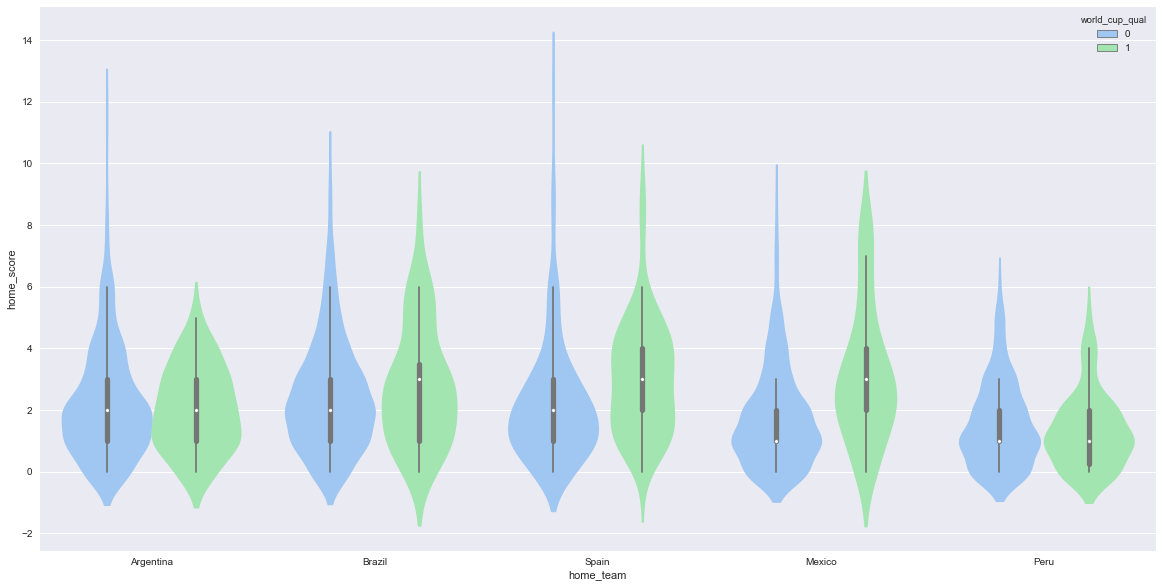

In [237]:
#plot showing home scores by home team, with color indicating world cup qualifying matches
sns.violinplot(x="home_team", y="home_score", hue="world_cup_qual", data=hisplatin_home, split = False, palette = 'pastel')

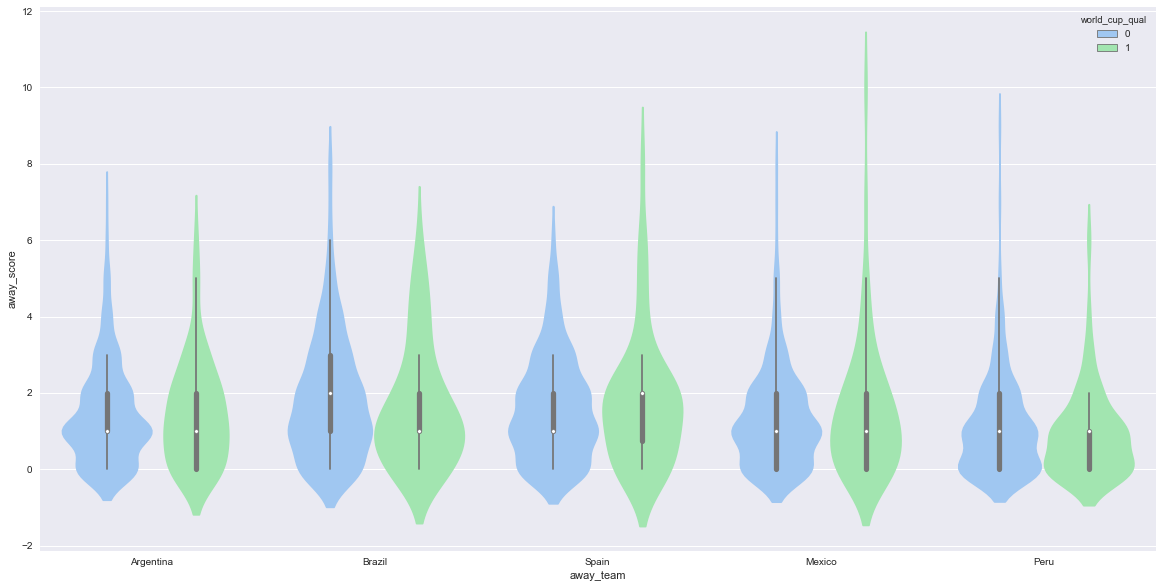

In [238]:
#plot showing away scores by away team, with color indicating world cup qualifying matches
sns.violinplot(x="away_team", y="away_score", hue="world_cup_qual", data=hisplatin_away, split = False, palette = 'pastel')

## Conclusion

To continue this experiement, we'd want to track the five countries' football teams, and note their performance at the World Cup (if applicable), as well as at the WC qualifying rounds. We'd compare the scores of the WC rounds and the WC qualifying rounds, and graph the correlation between the number of friendly matches a team participated in and their score in competitive matches -- most notably, at the World Cup. We will be able to confirm that more friendly matches correlates with higher scores if we see a significant and consistent increase of scores among teams at the World Cup who have participated in a high number of friendly matches.